# Лабраторная работа №2

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

## Подключение

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

## Функция $sin(x^2)$

In [2]:
def F(x):
  res=np.sin(x**2)
  return res

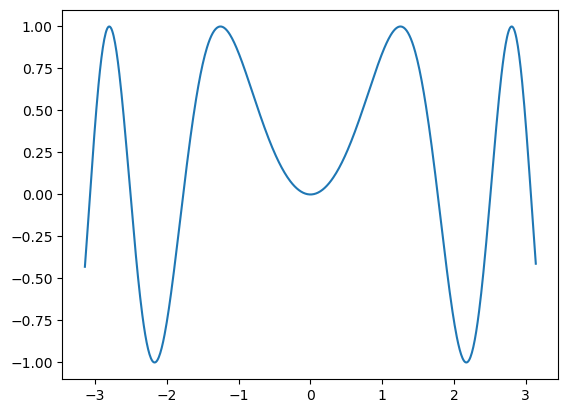

629


In [3]:
x=np.arange(-np.pi, np.pi, 0.01)

y=np.zeros(x.size)
for i in range(x.size):
  y[i]=F(x[i])
#x=x/np.pi
plt.plot(x,y)
plt.show()
print(x.size)

## Сигмоида

In [4]:
def Sigmoid(x):
  res=1/(1+np.exp(-x))
  return res

## KERAS model 30-10-1

### Количество эпох: 2000, Adam(0.01)

In [5]:
model = keras.Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=30, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.01))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

None


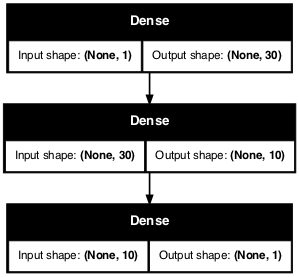

In [6]:
# формируем картинку со схемой модели
print(model.summary())
plot_model(model, dpi=60, show_shapes=True) # Выводим схему модели

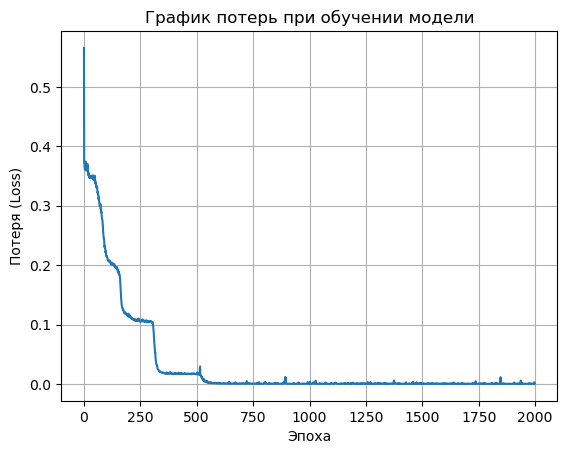

In [7]:
log1 = model.fit(x, y, epochs=2000, verbose=False)
plt.plot(log1.history['loss'])
plt.xlabel('Эпоха')
plt.ylabel('Потеря (Loss)')
plt.title('График потерь при обучении модели')
plt.grid(True)
plt.show()

### Количество эпох: 4000, Adam(0.001)

In [8]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

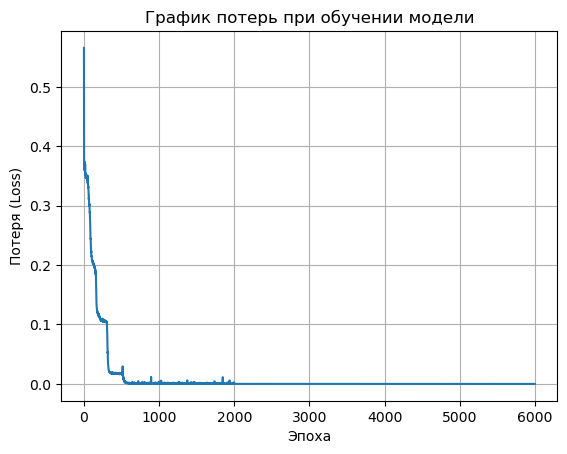

In [9]:
log2 = model.fit(x, y, epochs=4000, verbose=False)
plt.plot(log1.history['loss'] + log2.history['loss'])
plt.xlabel('Эпоха')
plt.ylabel('Потеря (Loss)')
plt.title('График потерь при обучении модели')
plt.grid(True)
plt.show()

In [10]:
final_loss = model.evaluate(x, y, verbose=False)
print(f"Окончательная ошибка сети: {final_loss}")

Окончательная ошибка сети: 1.352584695268888e-05


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


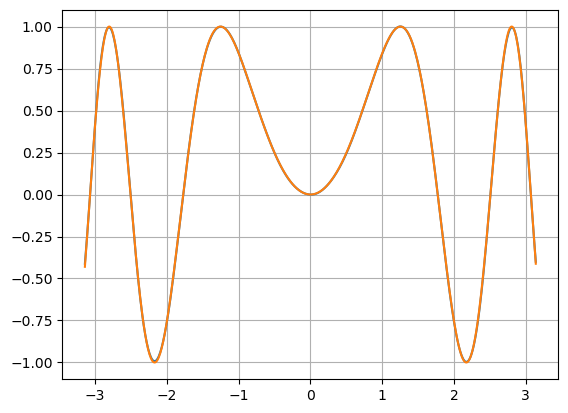

In [11]:
res=model.predict(x)
plt.plot(x,res)
plt.plot(x,y)
plt.grid(True)
plt.show()

(629, 1)
(629,)


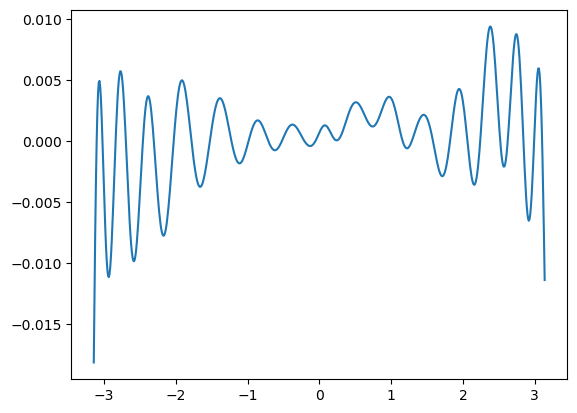

In [12]:
print(res.shape)
print(y.shape)
ey=y-res.reshape(-1)
plt.plot(x,ey)
plt.show()

In [13]:
sum=0
for i in range(ey.size):
  sum=sum+(ey[i]*ey[i])
mseRes=sum/ey.size
rmseRes=np.sqrt(sum/ey.size)
print('mse', mseRes)
print('rmse', rmseRes)
sum=0
for i in range(ey.size):
  sum=sum+np.abs(ey[i])
maeRes=sum/ey.size
print('mae', maeRes)

mse 1.3525846540232765e-05
rmse 0.0036777502009017367
mae 0.0026846075661309697


## Вывод

Мы провели обучение в два этапа: 
1) 2000 эпох + оптимизатор Adam с шагом 0.01;
2) 4000 эпохи + оптимизатор Adam с шагом 0.001. 

На первом этапе ошибка снижалась резко, а на втором этапе – более плавно, то есть сеть продолжала обучаться, но ошибка занчительно снизила свой темп снижения. Ошибка сети после полного обучения удовлетворительна. Дальнейшее обучение может не привести к значительным улучшениям из-за низкого темапа уменьшения ошибки, поэтому можно остановиться на достигнутом результате.